In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Deterministic example

The following cell is just generating and visualising the data we will work with.<br>
This has been done for you so that you can focus on learning the principles of linear regression.<br> Don't spend too long on it.

,sunny_hours,crop_yield_kg_ha
0,8.990915,2904.742677
1,8.734881,2626.844613
2,10.218638,4237.309181
3,8.416706,2281.498593
4,11.193640,5295.571934


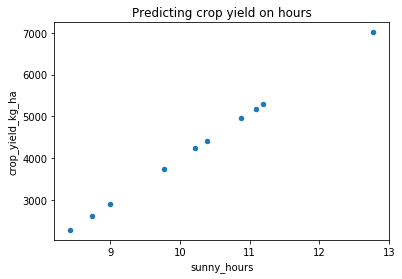

In [72]:
n = 10
X,y = make_regression(n,1,1,noise=0,bias=100)
feature1,target = 'sunshine_hours','crop_yield_kg_ha'
df = pd.DataFrame({feature1:X[:,0]+10,target:y*40})
df.plot.scatter(feature1,target)
plt.title('Predicting crop yield on hours')
df.head()

What crop yield would you estimate for 10 hours of sun?<br>
And for 12 hours?<br>
What logic did you follow?

### Calculating the line

$y = beta_0 + beta_1*X$<br>
$y = intercept + slope*X$

In [123]:
# Calculating the slope ( raise over run )
raise_ = df.loc[2,target] - df.loc[1,target]
run = df.loc[2,feature1] - df.loc[1,feature1]
beta_1 = raise_/run
beta_1

1085.3961270955836

$beta_0 = y - beta_1*X$

In [90]:
beta_0 = df.loc[2,target] - df.loc[2,feature1]*beta_1
beta_0

-6853.961270955835

### Generating predictions based on the line

In [111]:
new_data = np.array([10,12])

In [112]:
new_preds = new_data*beta_1 + beta_0
new_preds

array([4000.        , 6170.79225419])

,sunny_hours,crop_yield_kg_ha
0,8.990915,2904.742677
1,8.734881,2626.844613
2,10.218638,4237.309181
3,8.416706,2281.498593
4,11.193640,5295.571934


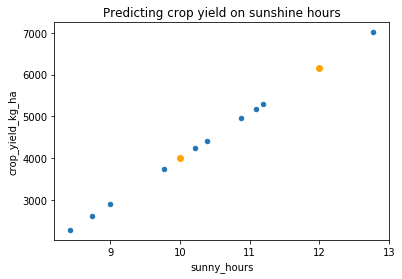

In [113]:
df.plot.scatter(feature1,target)
plt.scatter(new_data,new_preds,color='orange')
plt.title('Predicting crop yield on sunshine hours')
df.head()

### Visualising the intercept

In [117]:
new_data = np.array([10,12,0,6,-2])

In [118]:
new_preds = new_data*beta_1 + beta_0
new_preds

array([ 4000.        ,  6170.79225419, -6853.96127096,  -341.58450838,
       -9024.75352515])

,sunny_hours,crop_yield_kg_ha
0,8.990915,2904.742677
1,8.734881,2626.844613
2,10.218638,4237.309181
3,8.416706,2281.498593
4,11.193640,5295.571934


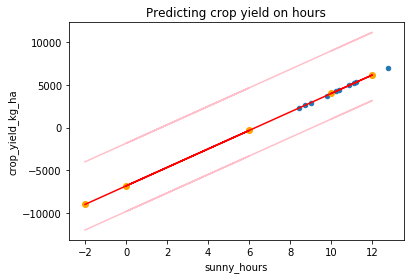

In [122]:
df.plot.scatter(feature1,target)
plt.scatter(new_data,new_preds,color='orange')
plt.plot(new_data,new_preds,color='red')
plt.plot(new_data,new_preds+5000,color='pink')
plt.plot(new_data,new_preds-3000,color='pink')
plt.title('Predicting crop yield on hours')
df.head()

### Figuring out the coefficients with statsmodels

In [131]:
import statsmodels.api as sm

# Setting up the LEARNER
Xc = sm.add_constant(df[feature1])
model_sm = sm.OLS(df[target],Xc)

# Actually LEARNING
results = model_sm.fit()

# # Understanding the LEARNED model
est_beta = results.params
print(est_beta.round(4))

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

R2 = 1.0
const            -6853.9613
sunshine_hours    1085.3961
dtype: float64


We can see that our constant or intercept matches the value we calculated earlier for beta_0<br>
The coefficient for 'sunshine_hours' also matches the value we calculated earlier for beta_1<br>
<br>
We can see our model has an $R^2 = 1$ which is the maximum and tells us the model predictions are correct 100% of the time<br>
(Don't expect this in real life)

# Noisy example

,sunshine_hours,crop_yield_kg_ha
0,8.825529,2711.330889
1,10.900177,5709.630408
2,9.789630,6168.044591
3,9.164238,2625.666522
4,10.277983,4319.497955


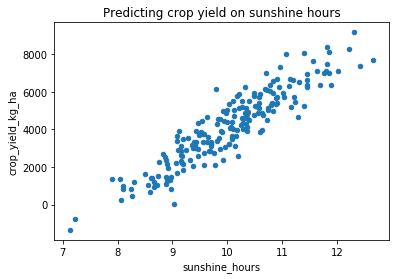

In [126]:
n = 200
X,y = make_regression(n,1,1,noise=20,bias=100)
feature1,target = 'sunshine_hours','crop_yield_kg_ha'
df2 = pd.DataFrame({feature1:X[:,0]+10,target:y*40})
df2.plot.scatter(feature1,target)
plt.title('Predicting crop yield on sunshine hours')
df2.head()

In this case, it is not possible to draw a straight line that goes through every single data point<br><br>
Instead, we try to find the **line of best fit**<br>
The line that is the least far from each point<br>
We will be using the **sum of the square errors** to guide us

### Squared Error

In [132]:
import statsmodels.api as sm

# Setting up the LEARNER
Xc = sm.add_constant(df2[feature1])
model_sm = sm.OLS(df2[target],Xc)

# Actually LEARNING
results = model_sm.fit()

# # Understanding the LEARNED model
est_beta = results.params
print(est_beta.round(4))

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

const            -14009.2424
sunshine_hours     1810.3657
dtype: float64
R2 = 0.85


//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [133]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       crop_yield_kg_ha   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 01 May 2020   Prob (F-statistic):           8.66e-84
Time:                        11:10:41   Log-Likelihood:                -1610.9
No. Observations:                 200   AIC:                             3226.
Df Residuals:                     198   BIC:                             3232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.401e+04    542.651    -25.816      0.000   -1.51e+04   -1.29e+04
sunshine_hours  1810.3657     53.838     33.626      0.000    1704.197    1916.535
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.666
Skew:                           0.107   Prob(JB):                        0.717
Kurtosis:                       3.184   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""